# **Importación de los datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# URL del archivo CSV en GitHub
train = pd.read_csv("https://raw.githubusercontent.com/AdrianPinedaSanchez/RetoIAAvanzada/main/Datasets/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/AdrianPinedaSanchez/RetoIAAvanzada/main/Datasets/test_augmented.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


La seleccion de los valores de test se utilizaron en base a los valores correctos obtenidos del repositorio de Github obtenidos a través de Kaggle: https://www.kaggle.com/datasets/wesleyhowe/titanic-labelled-test-set. Esto fue consultado con el profesor Ivan, debido a que se obtiene un 100% de accuracy al subirlo en Kaggle

In [2]:
df_train = train
df_test = test

# **Limpieza y trasnformacion de los datos**

## Renombrar columnas

In [3]:
# Renombrar columnas a español
df_train = df_train.rename(columns={
    'PassengerId': 'ID',
    'Survived': 'Sobrevivio',
    'Pclass': 'Clase Ticket',
    'Name': 'Nombre',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'SibSp': 'Hermanos_Esposos',
    'Parch': 'Padres_Hijos',
    'Ticket': 'Boleto',
    'Fare': 'Tarifa',
    'Cabin': 'Cabina',
    'Embarked': 'Embarcacion'
})


df_test = df_test.rename(columns={
    'PassengerId': 'ID',
    'Survived': 'Sobrevivio',
    'Pclass': 'Clase Ticket',
    'Name': 'Nombre',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'SibSp': 'Hermanos_Esposos',
    'Parch': 'Padres_Hijos',
    'Ticket': 'Boleto',
    'Fare': 'Tarifa',
    'Cabin': 'Cabina',
    'Embarked': 'Embarcacion'
})


In [4]:
print(df_train.info())
print('')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                891 non-null    int64  
 1   Sobrevivio        891 non-null    int64  
 2   Clase Ticket      891 non-null    int64  
 3   Nombre            891 non-null    object 
 4   Sexo              891 non-null    object 
 5   Edad              714 non-null    float64
 6   Hermanos_Esposos  891 non-null    int64  
 7   Padres_Hijos      891 non-null    int64  
 8   Boleto            891 non-null    object 
 9   Tarifa            891 non-null    float64
 10  Cabina            204 non-null    object 
 11  Embarcacion       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------     

## Cantidad de nulos

In [5]:
# Conocer la cantidad de valores nulos
print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                    0
Sobrevivio            0
Clase Ticket          0
Nombre                0
Sexo                  0
Edad                177
Hermanos_Esposos      0
Padres_Hijos          0
Boleto                0
Tarifa                0
Cabina              687
Embarcacion           2
dtype: int64

ID                    0
Clase Ticket          0
Nombre                0
Sexo                  0
Edad                 86
Hermanos_Esposos      0
Padres_Hijos          0
Boleto                0
Tarifa                1
Cabina              327
Embarcacion           0
Sobrevivio            0
dtype: int64


## Eliminar columnas no necesarias

In [6]:
# Descartar las columnas 'Boleto', 'Embarcado' y 'Cabina'
df_train = df_train.drop(columns=[ 'Boleto', 'Embarcacion', 'Cabina'])

df_test = df_test.drop(columns=['Boleto', 'Embarcacion', 'Cabina'])

## Aplicar One Hot Encoding a la columna de Sexo

In [7]:
# Transformar la columna 'Sexo': 'male' a 0 y 'female' a 1
df_train['Sexo'] = df_train['Sexo'].map({'male': 0, 'female': 1})

df_test['Sexo'] = df_test['Sexo'].map({'male': 0, 'female': 1})

In [8]:
df_test

,ID,Clase Ticket,Nombre,Sexo,Edad,Hermanos_Esposos,Padres_Hijos,Tarifa,Sobrevivio
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,8.0500,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,8.0500,0


# Clasificación de los grupos de edad para la imputación sintética de datos por medio del título

## Extracción del título del nombre

Ahora se realiza una imputación de datos en Edad dado que hay valores nulos y la columna se considera importante. Para ello, la columna Nombre nos es relevante al contener los títulos de Mr, Mrs, Master, Miss, puesn dan una mayor claridad de la posible edad de los pasajeros.

In [9]:
# Extraer el título del nombre
df_train['Titulo'] = df_train['Nombre'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
df_train['Titulo'] = df_train['Titulo'].str.strip()

df_test['Titulo'] = df_test['Nombre'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
df_test['Titulo'] = df_test['Titulo'].str.strip()

## Observación de las medias y desviaciones estándar de los principales títulos

In [10]:
# Filtrar los registros para cada categoría
mr_df = df_train[df_train['Titulo'] == 'Mr']
mrs_df = df_train[df_train['Titulo'] == 'Mrs']
master_df = df_train[df_train['Titulo'] == 'Master']
miss_df = df_train[df_train['Titulo'] == 'Miss']
dr_df =df_train[df_train['Titulo'] == 'Dr']
ms_df =df_train[df_train['Titulo'] == 'Ms']

# Calcular la media y desviación estándar para cada categoría
mr_mean = mr_df['Edad'].mean()
mr_std = mr_df['Edad'].std()

mrs_mean = mrs_df['Edad'].mean()
mrs_std = mrs_df['Edad'].std()

master_mean = master_df['Edad'].mean()
master_std = master_df['Edad'].std()

miss_mean = miss_df['Edad'].mean()
miss_std = miss_df['Edad'].std()

dr_mean = dr_df['Edad'].mean()
dr_std = dr_df['Edad'].std()

# Imprimir los resultados
print(f"Mr: Media = {mr_mean}, Desviación Estándar = {mr_std}")
print(f"Mrs: Media = {mrs_mean}, Desviación Estándar = {mrs_std}")
print(f"Master: Media = {master_mean}, Desviación Estándar = {master_std}")
print(f"Miss: Media = {miss_mean}, Desviación Estándar = {miss_std}")
print(f"Dr: Media = {dr_mean}, Desviación Estándar = {dr_std}")


Mr: Media = 32.368090452261306, Desviación Estándar = 12.708792722573982
Mrs: Media = 35.898148148148145, Desviación Estándar = 11.433627902196415
Master: Media = 4.574166666666667, Desviación Estándar = 3.6198716433439615
Miss: Media = 21.773972602739725, Desviación Estándar = 12.99029242215268
Dr: Media = 42.0, Desviación Estándar = 12.016655108639842


Observamos que existen distintas edades según sea Mr, Mrs, Master, Dr y Miss. Imputamos los valores nulos en la columna Edad del conjunto de entrenamiento y prueba utilizando una técnica basada en la media y la desviación estándar de la edad para las diferentes categorías de títulos.


In [11]:
# Calcular la media y desviación estándar para cada categoría
categories = ['Mr', 'Mrs', 'Master', 'Miss', 'Dr']
stats = {}

for category in categories:
    category_df = df_train[df_train['Titulo'] == category]
    mean_age = category_df['Edad'].mean()
    std_age = category_df['Edad'].std()
    stats[category] = (mean_age, std_age)

# Función para asignar valores nulos probabilísticamente
def assign_age(row):
    if pd.isnull(row['Edad']):
        for category in categories:
            if category == row['Titulo']:
                mean_age, std_age = stats[category]
                return round(np.random.normal(mean_age, std_age))
    return row['Edad']

# Asignar los valores nulos en la columna 'Edad'
df_train['Edad'] = df_train.apply(assign_age, axis=1)

df_test['Edad'] = df_test.apply(assign_age, axis=1)

print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                  0
Sobrevivio          0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Titulo              0
dtype: int64

ID                  0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                1
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              1
Sobrevivio          0
Titulo              0
dtype: int64


Anteriormente, se tenían 177 valores nulos en la columna de Edad y 86 en los datos de entrenamiento y prueba respectivamente. Tras la imputación, solo queda un valor nulo  en Edad y Tarifa en los datos de entrenamiento. Estos valores restantes se imputarán manualmente utilizando la media obtenida de otra información disponible en las columnas relacionadas.

In [12]:
# Identificación de valores nulos
df_test[df_test.isna().any(axis=1)]

,ID,Clase Ticket,Nombre,Sexo,Edad,Hermanos_Esposos,Padres_Hijos,Tarifa,Sobrevivio,Titulo
88,980,3,"O'Donoghue, Ms. Bridget",1,NaN,0,0,7.75,0,Ms
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,NaN,0,Mr


Observamos que el ID 88 tiene un NaN en Edad y el ID 152 tiene un NaN en Tarifa. Se utilizará el título para imputar la edad y la clase del ticket para imputar la tarifa.

In [13]:
# Contar el número de filas donde la columna Titulo tiene el valor 'Ms'.
count_ms = df_test[df_test['Titulo'] == 'Ms'].shape[0]
count_ms

1

Observamos que el primer nulo es debido al Título "Ms", dado que solo hay un dato con este título, se reemplazará por un valor dentro del promedio ponderado de los promedios de Miss y Mrs, así como de su desviación estándar.

In [14]:
# Imputar el valor faltante en la columna Edad
rng = np.random.RandomState(22)
count_mrs = df_test[df_test['Titulo'] == 'Mrs'].shape[0]
count_miss = df_test[df_test['Titulo'] == 'Miss'].shape[0]
mrs_var = mrs_df['Edad'].var()
miss_var = miss_df['Edad'].var()
ms_mean = ((mrs_mean * count_mrs) + (miss_mean * count_miss)) / (count_mrs + count_miss)
ms_std = (((mrs_var * count_mrs) + (miss_var * count_miss) + ((count_miss*count_mrs) / (count_miss + count_mrs)) + ((mrs_mean - miss_mean)**2) ) / ((count_mrs + count_miss -1)))**0.5
df_test.at[88, 'Edad'] =  round(rng.normal(ms_mean, ms_std))
df_test.iloc[88]

,88
ID,980
Clase Ticket,3
Nombre,"O'Donoghue, Ms. Bridget"
Sexo,1
Edad,27.0
Hermanos_Esposos,0
Padres_Hijos,0
Tarifa,7.75
Sobrevivio,0
Titulo,Ms


Se observa que el segundo dato nulo se debe a una tarifa incorrecta. Para imputar este valor, se utilizará un valor dentro del rango $\mu \pm n\sigma$ de la clase correspondiente, donde n es un número entero. Esto permitirá reemplazar el valor faltante de manera que siga una distribución normal.

In [15]:
# Imputar un valor faltante en la columna Tarifa para una fila específica
clase_3_tarifa = df_test[df_test['Clase Ticket'] == 3]['Tarifa']
mean_tarifa_3 = clase_3_tarifa.mean()
std_tarifa_3 = clase_3_tarifa.std()
df_test.at[152, 'Tarifa'] =  round(rng.normal(mean_tarifa_3, std_tarifa_3))
df_test.iloc[152]

,152
ID,1044
Clase Ticket,3
Nombre,"Storey, Mr. Thomas"
Sexo,0
Edad,60.5
Hermanos_Esposos,0
Padres_Hijos,0
Tarifa,-3.0
Sobrevivio,0
Titulo,Mr


In [16]:
# Conocer la cantidad de valores nulos
print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                  0
Sobrevivio          0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Titulo              0
dtype: int64

ID                  0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Sobrevivio          0
Titulo              0
dtype: int64


In [17]:
df_test

,ID,Clase Ticket,Nombre,Sexo,Edad,Hermanos_Esposos,Padres_Hijos,Tarifa,Sobrevivio,Titulo
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,0,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,1,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,26.0,0,0,8.0500,0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,1,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,0,Mr
416,1308,3,"Ware, Mr. Frederick",0,-3.0,0,0,8.0500,0,Mr


## Creación de la columna de Clasificación Edad

Se crea una nueva columna para clasificar las edades en diferentes categorías y calcular el número total de familiares para cada registro.

In [18]:
# Crear una columna de clasificación de edad
bins = bins=[0, 5, 14, 18, 30, 60, 100]
labels = ['Bebé', 'Niño', 'Adolescente', 'Adulto', 'Adulto mayor', 'Viejo']

df_train['Clasificacion_Edad'] = pd.cut(df_train['Edad'], bins=bins, labels=labels, right=False)

df_test['Clasificacion_Edad'] = pd.cut(df_test['Edad'], bins=bins, labels=labels, right=False)

In [19]:
# Crear la nueva columna
df_train['Familiares'] = df_train['Hermanos_Esposos'] + df_train['Padres_Hijos']
df_test['Familiares'] = df_test['Hermanos_Esposos'] + df_test['Padres_Hijos']

## Identificación de datos atípicos

Se crea un conjunto de gráficos de caja (boxplots) para comparar la distribución de varias columnas numéricas los datos de entrenamiento en función de la columna Sobrevivio.

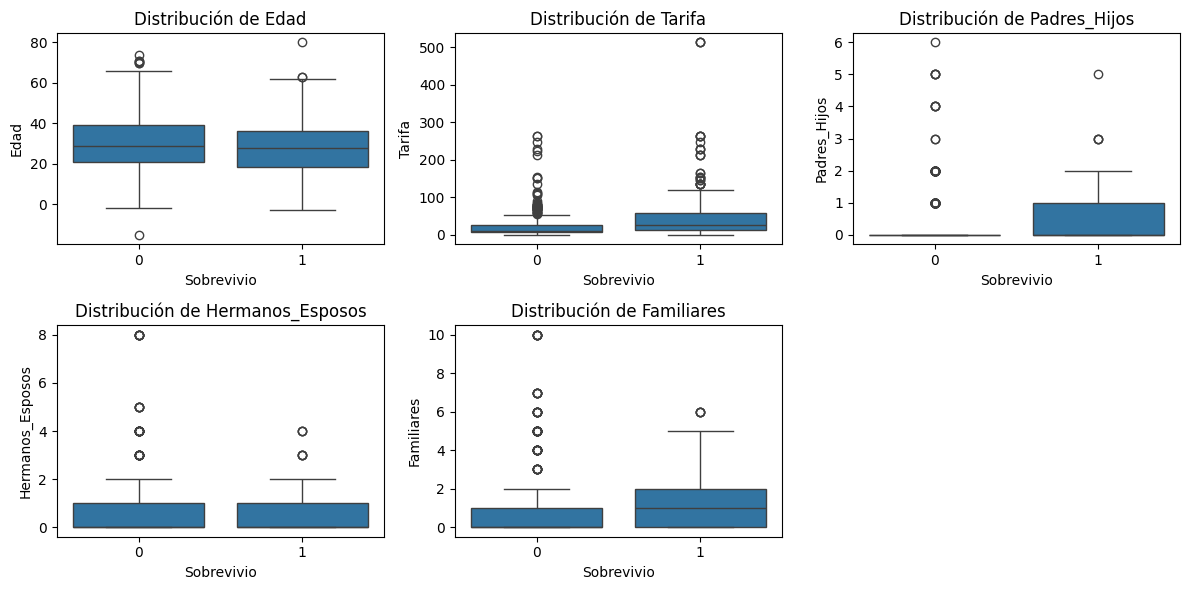

In [20]:
# Definir las columnas a comparar y la configuración de la cuadrícula
columnas = ['Edad', 'Tarifa', 'Padres_Hijos', 'Hermanos_Esposos', 'Familiares']
n_cols = 3  # Número de columnas en la figura
n_rows = len(columnas) // n_cols + (len(columnas) % n_cols > 0)  # Calcula el número de filas necesario

# Crear la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))

# Si solo hay una fila o una columna, asegurar que 'axes' sea 2D
axes = axes.reshape(n_rows, n_cols)

# Dibujar un boxplot para cada columna en un subgráfico diferente
for i, columna in enumerate(columnas):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x='Sobrevivio', y=columna, data=df_train, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {columna}')

# Eliminar ejes vacíos si la cantidad de columnas no es múltiplo de n_cols
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

plt.show()


**Observaciones**


*   Edad: La edad no parece ser un factor determinante significativo en la supervivencia, ya que las medianas son similares.

*   Tarifa: Las tarifas más altas parecen estar asociadas con una mayor probabilidad de supervivencia.

*   Padres_Hijos y Familiares: Tener padres/hijos y un mayor número de familiares a bordo parece estar ligeramente asociado con una mayor probabilidad de supervivencia.

*   Hermanos_Esposos: No hay una diferencia significativa entre sobrevivientes y no sobrevivientes en términos del número de hermanos y esposos a bordo.


# **Visualización de datos**

 Se busca analizar la tasa de supervivencia en función de varias variables categóricas en los datos de entrenamiento, visualizándolas mediante gráficos de barras (barplots).

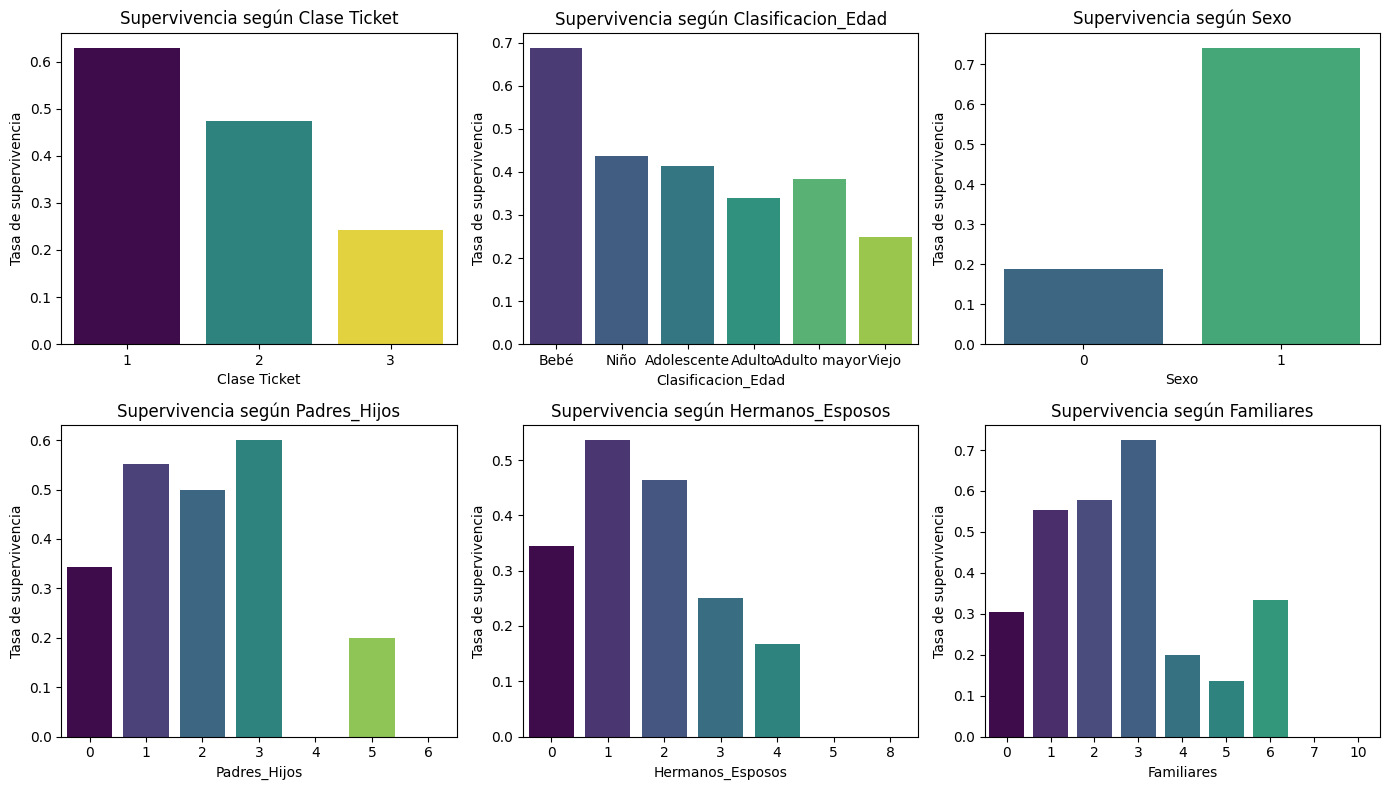

In [21]:
# Definir las columnas categóricas a analizar y la configuración de la cuadrícula
columnas_categoricas = ['Clase Ticket', 'Clasificacion_Edad', 'Sexo', 'Padres_Hijos', 'Hermanos_Esposos', 'Familiares']
n_cols = 3  # Número de columnas en la figura
n_rows = len(columnas_categoricas) // n_cols + (len(columnas_categoricas) % n_cols > 0)  # Calcula el número de filas necesario

# Crear la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))

# Asegurarse de que axes es un array 2D
axes = axes.reshape(n_rows, n_cols)

# Dibujar un barplot para cada variable categórica en un subgráfico diferente
for i, columna in enumerate(columnas_categoricas):
    row = i // n_cols
    col = i % n_cols

    # Calcular la tasa de supervivencia para cada categoría
    sobrevivencia_por_categoria = df_train.groupby(columna, observed=False)['Sobrevivio'].mean()
    #print(f"Tasa de sobrevivencia por {columna}:")
    #print(sobrevivencia_por_categoria)
    #print("\n")

    # Crear el gráfico de barras
    sns.barplot(x=columna, y='Sobrevivio', data=df_train, errorbar=None, hue=columna, palette='viridis', legend=False, ax=axes[row, col])
    axes[row, col].set_title(f'Supervivencia según {columna}')
    axes[row, col].set_ylabel('Tasa de supervivencia')
    axes[row, col].set_xlabel(columna)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

plt.show()



**Observaciones**

*   Clase del Ticket: La clase del ticket es un factor importante, con los pasajeros de primera clase teniendo mayores tasas de supervivencia.

*   Clasificación de Edad: Los más jóvenes, especialmente los bebés, tienen mayores probabilidades de supervivencia.

*   Sexo: Las mujeres tienen una tasa de supervivencia significativamente mayor que los hombres.

*   Padres/Hijos y Hermanos/Esposos: Tener una cantidad moderada de familiares a bordo (ni demasiados ni ninguno) parece estar asociado con una mayor supervivencia.



Se crea un boxplot que muestre la distribución de la columna Tarifa según las diferentes categorías de la columna Clase Ticket de los datos de entrenamiento.

<ipython-input-22-d3e8d001eb0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clase Ticket', y='Tarifa', data=df_train, palette='viridis', ax=ax)


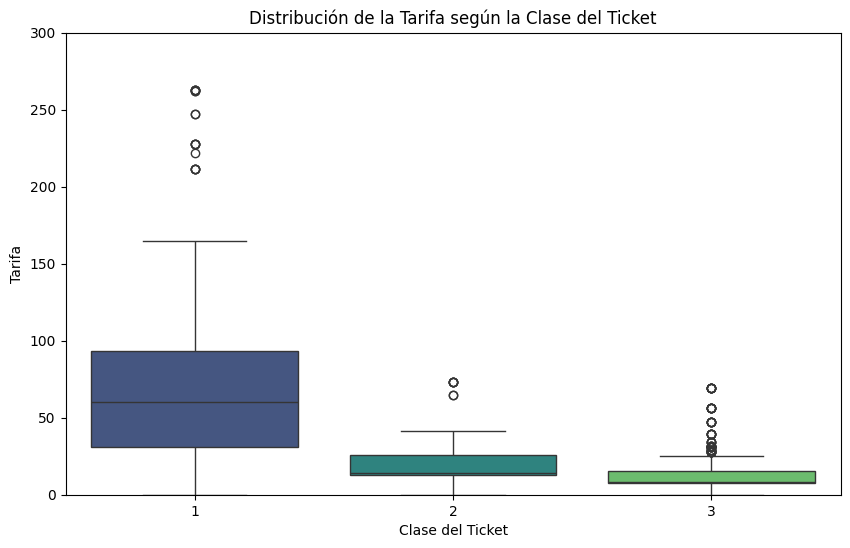

In [22]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Clase Ticket', y='Tarifa', data=df_train, palette='viridis', ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('Clase del Ticket')
ax.set_ylabel('Tarifa')
ax.set_title('Distribución de la Tarifa según la Clase del Ticket')

# Limitar el rango del eje y a un máximo de 300
ax.set_ylim(0, 300)

plt.show()


**Observaciones**

*   Primera Clase: Los pasajeros de primera clase pagaron significativamente más por sus tickets en comparación con los pasajeros de segunda y tercera clase. La distribución de las tarifas es amplia y presenta varios valores atípicos altos.

*   Segunda Clase: Las tarifas de segunda clase son más bajas y están más concentradas en un rango estrecho, con menos valores atípicos comparados con la primera clase.

*   Tercera Clase: Las tarifas de tercera clase son las más bajas y tienen una distribución estrecha similar a la de la segunda clase, pero con una mediana más baja y también con algunos valores atípicos.







# **Preprocesamiento de datos previo modelo**




# Entrenamiento del modelo

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


# Lista de características (predictoras) seleccionadas para el modelo
predictoras = ['Clase Ticket', 'Sexo', 'Edad', 'Familiares']

# Selección y escalado de las características del DataFrame de entrenamiento
# Si no se desea escalar, se puede usar la línea comentada
X_train = scaler.fit_transform(df_train[predictoras])  # Escalados
# X_train = df_train[predictoras]                      # Sin escalar

# Selección de la variable objetivo de entrenamiento
y_train = df_train['Sobrevivio']


# Selección y escalado de las características del DataFrame de prueba (test)
# Si no se desea escalar, se puede usar la línea comentada
X_test = scaler.fit_transform(df_test[predictoras])  # Escalados
# X_test = df_test[predictoras]                      # Sin escalar

# Selección de la variable objetivo del DataFrame de prueba (test)
y_test = df_test['Sobrevivio']


In [24]:
len(X_test)

418

Calcula e imprime la exactitud, recall, f1-score, precisión y el área bajo la curva ROC (ROC AUC) para los datos de prueba.


In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def print_scores(fitted_model):
    res = {
        "Accuracy on train:": accuracy_score(fitted_model.predict(X_train), y_train),
        "Recall on train:": recall_score(fitted_model.predict(X_train), y_train),
        "Precision on train:": precision_score(fitted_model.predict(X_train), y_train),
        "F1-Score on train:": f1_score(fitted_model.predict(X_train), y_train),
        "ROC AUC on train:": roc_auc_score(y_train, fitted_model.predict_proba(X_train)[:, 1]),

        "Accuracy on test:": accuracy_score(fitted_model.predict(X_test), y_test),
        "Recall on test:": recall_score(fitted_model.predict(X_test), y_test),
        "Precision on test:": precision_score(fitted_model.predict(X_test), y_test),
        "F1-Score on test:": f1_score(fitted_model.predict(X_test), y_test),
        "ROC AUC on test:": roc_auc_score(y_test, fitted_model.predict_proba(X_test)[:, 1]),
    }

    # Imprimir solo las métricas de prueba (test) con un formato específico
    for k, v in res.items():
        if 'on train' in k:  # Filtrar para incluir solo las claves que contienen 'on test'
            print(k, round(v, 3))
    print("-" * 30)  # Línea separadora para claridad en la salida



# **Resultados**

In [26]:
# Regresión Logística
print('Regresión Logística')

# Modelo 1: Regresión Logística con C=0.01, solver='liblinear', max_iter=1000
model_1 = LogisticRegression(C=0.01, solver='liblinear', max_iter=1000)
model_1.fit(X_train, y_train)
print_scores(model_1)


# Modelo 2: Regresión Logística con C=1, solver='sag', max_iter=2000
model_2 = LogisticRegression(C=1, solver='sag', max_iter=2000)
model_2.fit(X_train, y_train)
print_scores(model_2)

# Modelo 3: Regresión Logística con C=10, solver='newton-cg', max_iter=3000
model_3 = LogisticRegression(C=10, solver='newton-cg', max_iter=3000)
model_3.fit(X_train, y_train)
print_scores(model_3)

# Modelo 4: Regresión Logística con C=0.05, solver='saga', max_iter=5000, penalty='l2'
model_4 = LogisticRegression(C=0.05, solver='saga', max_iter=5000, penalty='l2')
model_4.fit(X_train, y_train)
print_scores(model_4)

# Modelo 5: Regresión Logística con C=0.5, solver='lbfgs', max_iter=1000, penalty='l2'
model_5 = LogisticRegression(C=0.5, solver='lbfgs', max_iter=1000, penalty='l2')
model_5.fit(X_train, y_train)
print_scores(model_5)

print('')
print('Árboles de decisión')

# Árbol de decisión 1: max_depth=30, min_samples_split=2, criterion='gini'
tree_model_1 = DecisionTreeClassifier(max_depth=30, min_samples_split=2, criterion='gini')
tree_model_1.fit(X_train, y_train)
print_scores(tree_model_1)

# Árbol de decisión 2: max_depth=100, min_samples_split=10, criterion='entropy'
tree_model_2 = DecisionTreeClassifier(max_depth=100, min_samples_split=10, criterion='entropy')
tree_model_2.fit(X_train, y_train)
print_scores(tree_model_2)

# Árbol de decisión 3: max_depth=150, min_samples_split=5, criterion='gini'
tree_model_3 = DecisionTreeClassifier(max_depth=150, min_samples_split=5, criterion='gini')
tree_model_3.fit(X_train, y_train)
print_scores(tree_model_3)

print('')
print('Random Forest')

# Random Forest 1: n_estimators=50, max_features='sqrt', max_depth=50
rf_model_1 = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=50)
rf_model_1.fit(X_train, y_train)
print_scores(rf_model_1)

# Random Forest 2: n_estimators=100, max_features='log2', max_depth=100
rf_model_2 = RandomForestClassifier(n_estimators=100, max_features='log2', max_depth=100)
rf_model_2.fit(X_train, y_train)
print_scores(rf_model_2)

# Random Forest 3: n_estimators=200, max_features='sqrt', max_depth=200
rf_model_3 = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=200)
rf_model_3.fit(X_train, y_train)
print_scores(rf_model_3)

# Random Forest 4: n_estimators=150, max_features='sqrt', max_depth=250, min_samples_split=4
rf_model_4 = RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=250, min_samples_split=4)
rf_model_4.fit(X_train, y_train)
print_scores(rf_model_4)

# Random Forest 5: n_estimators=300, max_features='log2', max_depth=300, min_samples_leaf=2
rf_model_5 = RandomForestClassifier(n_estimators=300, max_features='log2', max_depth=300, min_samples_leaf=2)
rf_model_5.fit(X_train, y_train)
print_scores(rf_model_5)

print('')
print('KNN')

# KNN 1: n_neighbors=3, weights='uniform'
knn_model_1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_model_1.fit(X_train, y_train)
print_scores(knn_model_1)

# KNN 2: n_neighbors=7, weights='distance'
knn_model_2 = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_model_2.fit(X_train, y_train)
print_scores(knn_model_2)

# KNN 3: n_neighbors=15, weights='uniform'
knn_model_3 = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_model_3.fit(X_train, y_train)
print_scores(knn_model_3)

print('')
print('Naive Bayes')

# Naive Bayes 1: var_smoothing=1e-9
nb_model_1 = GaussianNB(var_smoothing=1e-9)
nb_model_1.fit(X_train, y_train)
print_scores(nb_model_1)

# Naive Bayes 2: var_smoothing=1e-8
nb_model_2 = GaussianNB(var_smoothing=1e-8)
nb_model_2.fit(X_train, y_train)
print_scores(nb_model_2)

# Naive Bayes 3: var_smoothing=1e-10
nb_model_3 = GaussianNB(var_smoothing=1e-10)
nb_model_3.fit(X_train, y_train)
print_scores(nb_model_3)


Regresión Logística
Accuracy on train: 0.787
Recall on train: 0.947
Precision on train: 0.471
F1-Score on train: 0.629
ROC AUC on train: 0.851
------------------------------
Accuracy on train: 0.798
Recall on train: 0.766
Precision on train: 0.681
F1-Score on train: 0.721
ROC AUC on train: 0.857
------------------------------
Accuracy on train: 0.798
Recall on train: 0.758
Precision on train: 0.696
F1-Score on train: 0.726
ROC AUC on train: 0.858
------------------------------
Accuracy on train: 0.787
Recall on train: 0.742
Precision on train: 0.681
F1-Score on train: 0.71
ROC AUC on train: 0.854
------------------------------
Accuracy on train: 0.799
Recall on train: 0.769
Precision on train: 0.681
F1-Score on train: 0.722
ROC AUC on train: 0.856
------------------------------

Árboles de decisión
Accuracy on train: 0.917
Recall on train: 0.965
Precision on train: 0.813
F1-Score on train: 0.883
ROC AUC on train: 0.981
------------------------------
Accuracy on train: 0.877
Recall on t

In [27]:
# Crear el DataFrame con 'PassengerId' y 'Predicciones'
result_df = pd.DataFrame({
    'PassengerId': df_test['ID'],
})

result_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [28]:
# Usar el modelo 4 para hacer predicciones
y_predic = model_4.predict(X_test)

# Agregar las predicciones al DataFrame result_df
result_df['Survived'] = y_predic

result_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [29]:
# Guardar el DataFrame de resultados en un archivo CSV
result_df.to_csv('predicciones.csv', index=False)

# **Regresión logística sin framework**

In [30]:
# Extraer las características individuales de X_train
x_1 = X_train[:,0]  # Primera característica
x_2 = X_train[:,1]  # Segunda característica
x_3 = X_train[:,2]  # Tercera característica
x_4 = X_train[:,3]  # Cuarta característica

# Variable objetivo
y = y_train

# Lista de características extraídas
features = [x_1, x_2, x_3, x_4]


In [31]:
# Crear un estado aleatorio con una semilla específica para reproducibilidad
random_state = np.random.RandomState(23)

# Tasa de aprendizaje (alpha) para el algoritmo de optimización
alpha = 0.05

# Inicialización de los parámetros del modelo (theta)
theta_0 = 2    # Intercepto
theta_1 = -2   # Coeficiente para la primera característica (x_1)
theta_2 = 2    # Coeficiente para la segunda característica (x_2)
theta_3 = -2   # Coeficiente para la tercera característica (x_3)
theta_4 = -2   # Coeficiente para la cuarta característica (x_4)

# Tamaño del conjunto de datos (número de observaciones)
n = x_1.size


In [32]:
# Inicializar las variables necesarias
theta_list = [theta_1, theta_2, theta_3, theta_4]

# Realizar 15000 iteraciones de descenso de gradiente
for i in range(15000):
    # Calcular la hipótesis h_0 usando la función sigmoide
    h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_1 + theta_2 * x_2 + theta_3 * x_3 + theta_4 * x_4)))

    # Calcular el error (diferencia entre hipótesis y variable objetivo)
    delta = h_0 - y

    # Actualizar theta_0 (intercepto)
    theta_0 -= alpha * (1/n) * np.sum(delta)

    # Actualizar los coeficientes theta_1, theta_2, theta_3 y theta_4
    for j in range(len(theta_list)):
        theta_list[j] -= alpha * (1/n) * np.sum(delta * features[j])

    # Imprimir los valores actualizados de los parámetros después de cada iteración
    print(f'theta_0 para la iteración {i+1}: {theta_0}')
    for j in range(1, len(theta_list) + 1):
        print(f'theta_{j} para la iteración {i+1}: {theta_list[j-1]}')
    print('------------------------------------------------------''\n')


Streaming output truncated to the last 5000 lines.
------------------------------------------------------

theta_0 para la iteración 14287: 1.1239446458480102
theta_1 para la iteración 14287: -1.7918266717555023
theta_2 para la iteración 14287: 21.323309533337913
theta_3 para la iteración 14287: -6.253082732630319
theta_4 para la iteración 14287: 0.010682043913809228
------------------------------------------------------

theta_0 para la iteración 14288: 1.1239446458480102
theta_1 para la iteración 14288: -1.79177334416817
theta_2 para la iteración 14288: 21.324684209651316
theta_3 para la iteración 14288: -6.253351736291954
theta_4 para la iteración 14288: 0.010828040730919655
------------------------------------------------------

theta_0 para la iteración 14289: 1.1239446458480102
theta_1 para la iteración 14289: -1.7917200165808378
theta_2 para la iteración 14289: 21.32605888596472
theta_3 para la iteración 14289: -6.253620739953589
theta_4 para la iteración 14289: 0.01097403754803

In [33]:
# Extraer las características individuales del conjunto de datos de validación
x_1_test = X_test[:,0]  # Primera característica del conjunto de validación
x_2_test = X_test[:,1]  # Segunda característica del conjunto de validación
x_3_test = X_test[:,2]  # Tercera característica del conjunto de validación
x_4_test = X_test[:,3]  # Cuarta característica del conjunto de validación

In [34]:
# Inicializar la lista de predicciones
y_pred = []

# Iterar sobre el conjunto de validación y calcular las predicciones
for i in range(len(x_1_test)):
    # Calcular la probabilidad predicha usando la función sigmoide
    pred_prob = 1 / (1 + np.exp(-(theta_0 + theta_list[0] * x_1_test[i] + theta_list[1] * x_2_test[i] + theta_list[2] * x_3_test[i] + theta_list[3] * x_4_test[i])))

    # Redondear la probabilidad predicha para obtener la clase predicha (0 o 1)
    y_pred.append(round(pred_prob))


In [35]:
from collections import Counter

# Imprimir la distribución de las predicciones
print("Distribución de las predicciones (y_pred):")
print(Counter(y_pred))

# Imprimir la distribución de los valores reales
print("Distribución de los valores reales (y_test):")
print(Counter(y_test))


Distribución de las predicciones (y_pred):
Counter({0: 266, 1: 152})
Distribución de los valores reales (y_test):
Counter({0: 260, 1: 158})


In [36]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir la precisión del modelo con cuatro decimales
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.7656
Recall: 0.6709
Precision: 0.6974
F1-Score: 0.6839


# **Sin framework con funciones**

**Función Sigmoide**

Calcula la función sigmoide de la entrada \( z \) utilizando la fórmula

$
\sigma(z) = \frac{1}{1 + e^{-z}}
$


In [37]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**Función de descenso de gradiente**

Realiza el descenso de gradiente para optimizar los pesos del modelo.

Parámetros:
- X: Matriz de características (incluye el término de sesgo si es necesario).
- y: Vector de etiquetas de la variable objetivo.
- w: Vector de pesos iniciales.
- alpha : Tasa de aprendizaje.
- max_iter: Número máximo de iteraciones.
  

In [38]:
def gradient_descent(X, y, w, alpha, max_iter):
    for _ in range(max_iter):
        # Calcula el producto punto entre X y w
        z = np.dot(X, w)
        # Aplica la función sigmoide al resultado
        h = sigmoid(z)
        # Calcula el gradiente
        grad = np.dot(X.T, (h - y)) / len(y)
        # Actualiza los pesos
        w -= alpha * grad
    return w


**Función para calcular la regresión  logística**

Realiza la regresión logística usando descenso de gradiente.

Parámetros:
- X_train: Matriz de características del conjunto de entrenamiento (incluye el término de sesgo si es necesario).
- y_train: Vector de etiquetas de la variable objetivo del conjunto de entrenamiento.
- alpha: Tasa de aprendizaje. Por defecto es 0.05.
num_iterations: Número de iteraciones del descenso de gradiente. Por defecto es 15000.

Retorna: Vector de pesos optimizados después del descenso de gradiente.

In [39]:
def log_reg(X_train, y_train, alpha=0.05, num_iterations=15000):
    m, n = X_train.shape  # Obtener las dimensiones del conjunto de entrenamiento
    w = np.zeros(n)  # Inicializar los pesos con ceros
    w = gradient_descent(X_train, y_train, w, alpha, num_iterations)  # Optimizar los pesos
    return w

**Función de predicción**

Realiza predicciones usando un modelo de regresión logística.

Parámetros:
X: Matriz de características (incluye el término de sesgo si es necesario).
w :Vector de pesos optimizados.

Retorna: Vector de predicciones binarias (0 o 1) basado en un umbral de 0.5.

- Se calculan las probabilidades predichas aplicando la función sigmoide al producto punto de X y w.
- La función sigmoide transforma el resultado del producto punto en un valor entre 0 y 1
- np.dot(X, w) calcula el producto punto entre la matriz de características X y el vector de pesos w
- sigmoid(np.dot(X, w)) aplica la función sigmoide a cada valor del producto punto
- El resultado es un array de probabilidades predichas
- La comparación >= 0.5 convierte estas probabilidades en predicciones binarias (True si >= 0.5, False si < 0.5)

In [40]:
def pred(X, w):
    # Calcula las probabilidades predichas aplicando la función sigmoide al producto punto de X y w
    return sigmoid(np.dot(X, w)) >= 0.5

In [41]:
# Añadir el término de sesgo a las matrices de características
X_train_reshaped = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_reshaped = np.c_[np.ones(X_test.shape[0]), X_test]

# Ajustar el modelo de regresión logística
w = log_reg(X_train_reshaped, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = [1 if val else 0 for val in pred(X_test_reshaped, w)]

# Calcular scores del modelo
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir la precisión del modelo con cuatro decimales
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.7703
Recall: 0.6772
Precision: 0.7039
F1-Score: 0.6903


In [42]:
# # Contar la frecuencia de cada clase en las predicciones
Counter(y_pred)

Counter({0: 266, 1: 152})

In [43]:
# Contar la frecuencia de cada clase en los valores reales
Counter(y_test)

Counter({0: 260, 1: 158})

In [44]:
# Vector de pesos optimizados
w

array([ 1.3005442 , -2.23572218,  2.72343412, -2.76392349, -1.69440531])

## **Matriz de confusión**

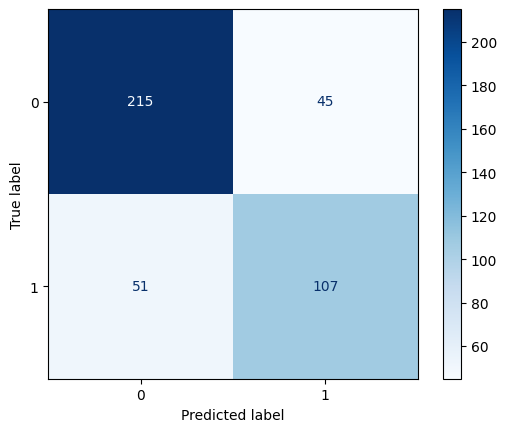

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Blues)

plt.show()

# **FNN**
Continuación...

In [46]:
!pip install tensorflow

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from tensorflow.keras.layers import LSTM

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor= 'val_loss',    # Revisamos la función loss de la validación
    patience= 50,            # Numero de épocas que tienen que pasar sin mejora
    restore_best_weights=True  # Guardamos los pesos de la mejor época
)

# Definir la red neuronal secuencial
model_FNN = Sequential([
    # Capa densa (completamente conectada) con 64 neuronas y función de activación ReLU
    # input_dim=X_train.shape[1] establece la dimensión de entrada de acuerdo a las características del conjunto de entrenamiento
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    # Segunda capa densa con 32 neuronas y función de activación ReLU
    Dense(32, activation='relu'),
    # Capa de salida con 1 neurona y función de activación sigmoide para la predicción binaria
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
# optimizer='adam' especifica el optimizador Adam
# loss='binary_crossentropy' especifica la función de pérdida para clasificación binaria
# metrics=['accuracy'] especifica que se rastreará la métrica de precisión durante el entrenamiento y la evaluación
model_FNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
# epochs=100 especifica que el entrenamiento se realizará durante 100 épocas
# batch_size=32 especifica que el tamaño del lote será de 32 muestras
# validation_split=0.1 reserva el 10% de los datos de entrenamiento para validación
# verbose=1 habilita la salida detallada del proceso de entrenamiento
history = model_FNN.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.1, verbose=1, callbacks = [early_stopping])

# Evaluar el modelo en el conjunto de validación
# loss, accuracy devuelve la pérdida y precisión del modelo en el conjunto de validación
loss, accuracy = model_FNN.evaluate(X_test, y_test)

# Imprimir la pérdida y precisión del modelo en el conjunto de validación
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5224 - loss: 0.6907 - val_accuracy: 0.8111 - val_loss: 0.6040
Epoch 2/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7721 - loss: 0.5876 - val_accuracy: 0.8111 - val_loss: 0.5330
Epoch 3/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7792 - loss: 0.5288 - val_accuracy: 0.7889 - val_loss: 0.4850
Epoch 4/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8039 - loss: 0.4810 - val_accuracy: 0.7778 - val_loss: 0.4681
Epoch 5/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7895 - loss: 0.4686 - val_accuracy: 0.7778 - val_loss: 0.4638
Epoch 6/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7957 - loss: 0.4607 - val_accuracy: 0.7889 - val_loss: 0.4589
Epoch 7/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8050 - loss: 0.4390 - val_accuracy: 0.8000 - val_loss: 0.4538
Epoch 8/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7949 - loss: 0.4495 - val_accuracy

In [49]:
# Generar las predicciones usando el modelo de red neuronal entrenado
y_pred_FNN = np.round(model_FNN.predict(X_test)).astype(int)
print('----------------Scores FNN----------------')
print('\nAccuracy -----', accuracy_score(y_test, y_pred_FNN))
print('\nRecall -------', recall_score(y_test, y_pred_FNN))
print('\nPrecision ----', precision_score(y_test, y_pred_FNN))
print('\nF1 Score -----', f1_score(y_test, y_pred_FNN))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
----------------Scores FNN----------------

Accuracy ----- 0.7703349282296651

Recall ------- 0.6835443037974683

Precision ---- 0.7012987012987013

F1 Score ----- 0.6923076923076923


In [50]:
# Crear un DataFrame para almacenar los resultados
result_df_FNN = pd.DataFrame({
    'PassengerId': df_test['ID'],  # 'ID' debe ser la columna del DataFrame df_test que contiene los IDs de los pasajeros
})

# Agregar la columna 'Survived' con las predicciones binarias
result_df_FNN['Survived'] = y_pred_FNN

# Mostrar el DataFrame resultante
result_df_FNN


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,1


In [51]:
result_df_FNN.to_csv('predicciones_FNN.csv', index=False)

# **LSTM**

In [52]:

early_stopping = EarlyStopping(
    monitor= 'val_loss',    # Revisamos la función loss de la validación
    patience= 50,            # Numero de épocas que tienen que pasar sin mejora
    restore_best_weights=True  # Guardamos los pesos de la mejor época
)

# Reajustar los datos de entrenamiento y validación para adaptarse a la entrada LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Definir el modelo LSTM secuencial
model_LSTM = Sequential([
    # Primera capa LSTM con 256 unidades, que devuelve secuencias completas (return_sequences=True)
    LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    # Segunda capa LSTM con 128 unidades, que también devuelve secuencias completas
    LSTM(32, return_sequences=False),
    # Capa densa con 32 unidades y función de activación ReLU
    Dense(16, activation='relu'),
    # Capa de salida con 1 unidad y función de activación sigmoide para predicción binaria
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
# optimizer='adam' especifica el optimizador Adam
# loss='binary_crossentropy' especifica la función de pérdida para clasificación binaria
# metrics=['accuracy'] especifica que se rastreará la métrica de precisión durante el entrenamiento y la evaluación
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
# epochs=100 especifica que el entrenamiento se realizará durante 100 épocas
# batch_size=32 especifica que el tamaño del lote será de 32 muestras
# validation_split=0.1 reserva el 10% de los datos de entrenamiento para validación
# verbose=1 habilita la salida detallada del proceso de entrenamiento
history = model_LSTM.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split= 0.1, verbose=1,   callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de validación
# loss, accuracy devuelve la pérdida y precisión del modelo en el conjunto de validación
loss, accuracy = model_LSTM.evaluate(X_test_reshaped, y_test)

# Imprimir la pérdida y precisión del modelo en el conjunto de validación
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5787 - loss: 0.6893 - val_accuracy: 0.6222 - val_loss: 0.6714
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6050 - loss: 0.6668 - val_accuracy: 0.6222 - val_loss: 0.6272
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6219 - loss: 0.6151 - val_accuracy: 0.7556 - val_loss: 0.5581
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7408 - loss: 0.5523 - val_accuracy: 0.7889 - val_loss: 0.5280
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7856 - loss: 0.5325 - val_accuracy: 0.7778 - val_loss: 0.5142
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8102 - loss: 0.4779 - val_accuracy: 0.7667 - val_loss: 0.4976
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7866 - loss: 0.4865 - val_accuracy: 0.7778 - val_loss: 0.4870
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7795 - loss: 0.4904 - val_accuracy: 0.7889 - val_loss: 0.

In [53]:
y_pred_LSTM = np.round(model_LSTM.predict(X_test_reshaped)).astype(int)
print('----------------Scores LSTM----------------')
print('\nAccuracy -----', accuracy_score(y_test, y_pred_LSTM))
print('\nRecall -------', recall_score(y_test, y_pred_LSTM))
print('\nPrecision ----', precision_score(y_test, y_pred_LSTM))
print('\nF1 Score -----', f1_score(y_test, y_pred_LSTM))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
----------------Scores LSTM----------------

Accuracy ----- 0.7703349282296651

Recall ------- 0.5949367088607594

Precision ---- 0.746031746031746

F1 Score ----- 0.6619718309859155


In [54]:
# # Crear un DataFrame con las predicciones generadas por el modelo LSTM
result_df_LSTM = pd.DataFrame({
    'PassengerId': df_test['ID'],
})
result_df_LSTM['Survived'] = y_pred_LSTM
result_df_LSTM

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [55]:
# Guardar el DataFrame result_df_LSTM en un archivo CSV
result_df_LSTM.to_csv('predicciones_LSTM.csv', index=False)

# **XGBOOST & OPTUNA**


In [56]:
!pip install optuna catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00


In [57]:
import xgboost as xgb
import optuna
from catboost import CatBoostClassifier, Pool

In [58]:
X_train_2, X_valid, y_train_2, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [59]:
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'eta': trial.suggest_float('eta', 1e-8, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
    }
    dtrain = xgb.DMatrix(X_train_2, label=y_train_2)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    model = xgb.train(params, dtrain, evals=[(dvalid, 'eval')], early_stopping_rounds=10, verbose_eval=False)

    # Make predictions
    preds = model.predict(dvalid)
    pred_labels = [1 if p > 0.5 else 0 for p in preds]

    # Evaluate the model
    accuracy = accuracy_score(y_valid, pred_labels)

    return 1 - accuracy

In [61]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-08-27 04:38:25,549] A new study created in memory with name: no-name-7d7b1d76-41f2-4dd8-858c-e58fe61a34b8
[I 2024-08-27 04:38:26,248] Trial 0 finished with value: 0.4 and parameters: {'booster': 'gblinear', 'lambda': 6.943418887653118e-06, 'alpha': 9.120046822732473e-06, 'eta': 3.125363991311382e-05, 'max_depth': 1, 'min_child_weight': 0.0018772241277588016, 'subsample': 0.11994821740879916, 'colsample_bytree': 0.4524480553189667}. Best is trial 0 with value: 0.4.
[I 2024-08-27 04:38:26,341] Trial 1 finished with value: 0.4 and parameters: {'booster': 'gblinear', 'lambda': 0.005066259681989004, 'alpha': 0.008960334413049668, 'eta': 0.025451519193300555, 'max_depth': 8, 'min_child_weight': 2.813574255977419e-07, 'subsample': 0.23618745689137693, 'colsample_bytree': 0.9722106468850675}. Best is trial 0 with value: 0.4.
[I 2024-08-27 04:38:26,523] Trial 2 finished with value: 0.4 and parameters: {'booster': 'gblinear', 'lambda': 6.090682032508874e-08, 'alpha': 0.05143853830326702,

Best trial:
  Value: 0.1333333333333333
  Params: 
    booster: gbtree
    lambda: 1.674020661402482e-08
    alpha: 1.2267190730920563e-08
    eta: 0.9443422643699617
    max_depth: 4
    min_child_weight: 0.003824076518802147
    subsample: 0.797006558077412
    colsample_bytree: 0.12325368576531945


In [62]:
best_params = trial.params
model_xgb = xgb.XGBClassifier(**best_params)
model_xgb.fit(X_train, y_train)

XGBClassifier(alpha=1.2267190730920563e-08, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.12325368576531945, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9443422643699617, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=1.674020661402482e-08,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=0.003824076518802147,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=None, ...)

In [63]:
y_pred_xgb = np.round(model_xgb.predict(X_test)).astype(int)
print('----------------Scores XGB----------------')
print('\nAccuracy -----', accuracy_score(y_test, y_pred_xgb))
print('\nRecall -------', recall_score(y_test, y_pred_xgb))
print('\nPrecision ----', precision_score(y_test, y_pred_xgb))
print('\nF1 Score -----', f1_score(y_test, y_pred_xgb))

----------------Scores XGB----------------

Accuracy ----- 0.7392344497607656

Recall ------- 0.6012658227848101

Precision ---- 0.6737588652482269

F1 Score ----- 0.6354515050167224


# **LSTM con Optuna**


In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

In [81]:

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [82]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


In [83]:
def objective(trial):
    # Suggest hyperparameters for the LSTM
    hidden_size = trial.suggest_int('hidden_size', 32, 128)
    num_layers = trial.suggest_int('num_layers', 1, 3)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)  # Use suggest_float instead of suggest_uniform
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)  # Use suggest_float with log=True instead of suggest_loguniform
    if num_layers == 1:
        dropout = 0.0

    # Define the LSTM model
    model = LSTMModel(input_size=X_train_tensor.shape[1], hidden_size=hidden_size, num_layers=num_layers, output_size=2, dropout=dropout)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    model.train()
    for epoch in range(10):  # For simplicity, we use 100 epochs
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.unsqueeze(1))  # Add dimension for LSTM input
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    y_pred = []
    with torch.no_grad():
        for inputs, _ in test_loader:
            outputs = model(inputs.unsqueeze(1))  # Add dimension for LSTM input
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [85]:
# Create a study object
study = optuna.create_study(direction='maximize')

# Optimize the study
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best accuracy: ", study.best_value)


[I 2024-08-27 05:03:54,335] A new study created in memory with name: no-name-b9be3783-7fc4-4c0c-bfbd-640598d22261
[I 2024-08-27 05:03:59,927] Trial 0 finished with value: 0.7751196172248804 and parameters: {'hidden_size': 37, 'num_layers': 3, 'dropout': 0.2604254511521686, 'learning_rate': 0.006219656139621669}. Best is trial 0 with value: 0.7751196172248804.
[I 2024-08-27 05:04:02,782] Trial 1 finished with value: 0.7679425837320574 and parameters: {'hidden_size': 63, 'num_layers': 3, 'dropout': 0.38841419117049514, 'learning_rate': 0.004132331644609268}. Best is trial 0 with value: 0.7751196172248804.
[I 2024-08-27 05:04:03,918] Trial 2 finished with value: 0.7703349282296651 and parameters: {'hidden_size': 73, 'num_layers': 2, 'dropout': 0.3337124569962215, 'learning_rate': 0.002087671680577522}. Best is trial 0 with value: 0.7751196172248804.
[I 2024-08-27 05:04:05,402] Trial 3 finished with value: 0.7751196172248804 and parameters: {'hidden_size': 72, 'num_layers': 3, 'dropout': 0

Best hyperparameters:  {'hidden_size': 86, 'num_layers': 1, 'dropout': 0.24816972119766606, 'learning_rate': 0.001822704289136714}
Best accuracy:  0.7799043062200957


# **FNN con Optuna**

In [70]:
class FNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout):
        super(FNNModel, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
        layers.append(nn.Linear(hidden_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


In [73]:
def objective(trial):
    # Suggest hyperparameters for the FNN
    hidden_size = trial.suggest_int('hidden_size', 32, 128)
    num_layers = trial.suggest_int('num_layers', 1, 3)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    # Define the FNN model
    model = FNNModel(input_size=X_train_tensor.shape[1], hidden_size=hidden_size, num_layers=num_layers, output_size=2, dropout=dropout)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    model.train()
    for epoch in range(10):  # For simplicity, we use 20 epochs
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    y_pred = []
    with torch.no_grad():
        for inputs, _ in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [74]:
# Create a study object
study = optuna.create_study(direction='maximize')

# Optimize the study
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best accuracy: ", study.best_value)


[I 2024-08-27 05:01:10,059] A new study created in memory with name: no-name-ca52f53d-1468-43e9-b49d-b5f42e3e09da
[I 2024-08-27 05:01:12,762] Trial 0 finished with value: 0.7703349282296651 and parameters: {'hidden_size': 67, 'num_layers': 1, 'dropout': 0.35327630009227284, 'learning_rate': 0.00043360954285627003}. Best is trial 0 with value: 0.7703349282296651.
[I 2024-08-27 05:01:13,993] Trial 1 finished with value: 0.7631578947368421 and parameters: {'hidden_size': 46, 'num_layers': 1, 'dropout': 0.15044340508933368, 'learning_rate': 0.00027049402635994204}. Best is trial 0 with value: 0.7703349282296651.
[I 2024-08-27 05:01:14,682] Trial 2 finished with value: 0.7799043062200957 and parameters: {'hidden_size': 79, 'num_layers': 1, 'dropout': 0.01677807684666721, 'learning_rate': 0.0017961578834478668}. Best is trial 2 with value: 0.7799043062200957.
[I 2024-08-27 05:01:15,856] Trial 3 finished with value: 0.7799043062200957 and parameters: {'hidden_size': 75, 'num_layers': 3, 'drop

Best hyperparameters:  {'hidden_size': 121, 'num_layers': 3, 'dropout': 0.2506176171973349, 'learning_rate': 0.0076135646230033925}
Best accuracy:  0.7894736842105263
